# Final Project: Contraceptive Data

#### Authors

Brandon Chu, Emily Pham, Rosetta Wang

#### Due Date

Wednesday, May 13, 2020

#### Description

In this notebook, we will be analyzing data from a subset of the 1987 National Indonesia Contraceptive Prevalence Survey.

In [1]:
# Set up notebook by importing libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import contraceptive data as DataFrame
data = pd.read_csv("data/contraceptive_for_students.csv")

# Display data
data.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


## Exploratory Data Analysis

Before modeling the data, we first conduct exploratory data analysis to summarize the data's main characteristics.

From the UCI Machine Learning Repository, we get the following information about each of the variables:

1. `wife_age`: (numerical)
2. `wife_education`: (categorical) 1=low, 2, 3, 4=high
3. `husband_eduation`: (categorical) 1=low, 2, 3, 4=high
4. `num_child`: (numerical)
5. `wife_religion`: (binary) 0=Non-Islam, 1=Islam
6. `wife_work`: (binary) 0=Yes, 1=No
7. `husband_occupation`: (categorical) 1, 2, 3, 4
8. `standard_living`: (categorical) 1=low, 2, 3, 4=high
9. `media_exposure`: (binary) 0=Good, 1=Not good
10. `contraceptive`: (class attribute) 1=No-use, 2=Long-term, 3=Short-term

In [3]:
# Display data types
data.dtypes

wife_age              int64
wife_education        int64
husband_education     int64
num_child             int64
wife_religion         int64
wife_work             int64
husband_occupation    int64
standard_living       int64
media_exposure        int64
contraceptive         int64
dtype: object

In [4]:
# Display number of observations
data.count()

wife_age              1473
wife_education        1473
husband_education     1473
num_child             1473
wife_religion         1473
wife_work             1473
husband_occupation    1473
standard_living       1473
media_exposure        1473
contraceptive         1473
dtype: int64

In [5]:
# Finding number of null values
data.isnull().sum()

wife_age              0
wife_education        0
husband_education     0
num_child             0
wife_religion         0
wife_work             0
husband_occupation    0
standard_living       0
media_exposure        0
contraceptive         0
dtype: int64

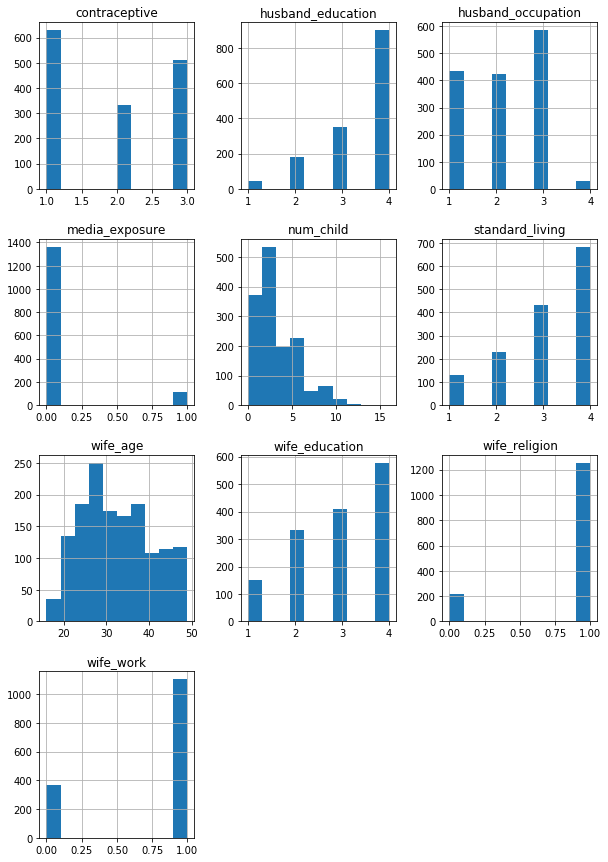

In [6]:
# Create histograms of numerical variables
data.hist(figsize = (10, 15));

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
wife_age,1.000000,-0.048011,-0.052879,0.540126,-0.139543,-0.039880,-0.202532,0.184485,0.113306,-0.162953
wife_education,-0.048011,1.000000,0.618369,-0.193839,-0.232973,-0.062200,-0.395921,0.361450,-0.336080,0.149777
husband_education,-0.052879,0.618369,1.000000,-0.187513,-0.178447,0.001099,-0.337003,0.357490,-0.288691,0.103226
num_child,0.540126,-0.193839,-0.187513,1.000000,0.073917,0.097316,-0.023000,-0.006046,0.133658,0.082772
wife_religion,-0.139543,-0.232973,-0.178447,0.073917,1.000000,0.069837,0.084417,-0.196308,0.060243,-0.025271
wife_work,-0.039880,-0.062200,0.001099,0.097316,0.069837,1.000000,0.014232,-0.076505,0.001828,0.054438
husband_occupation,-0.202532,-0.395921,-0.337003,-0.023000,0.084417,0.014232,1.000000,-0.293831,0.113925,0.018161
standard_living,0.184485,0.361450,0.357490,-0.006046,-0.196308,-0.076505,-0.293831,1.000000,-0.251359,0.091149
media_exposure,0.113306,-0.336080,-0.288691,0.133658,0.060243,0.001828,0.113925,-0.251359,1.000000,-0.119206
contraceptive,-0.162953,0.149777,0.103226,0.082772,-0.025271,0.054438,0.018161,0.091149,-0.119206,1.000000


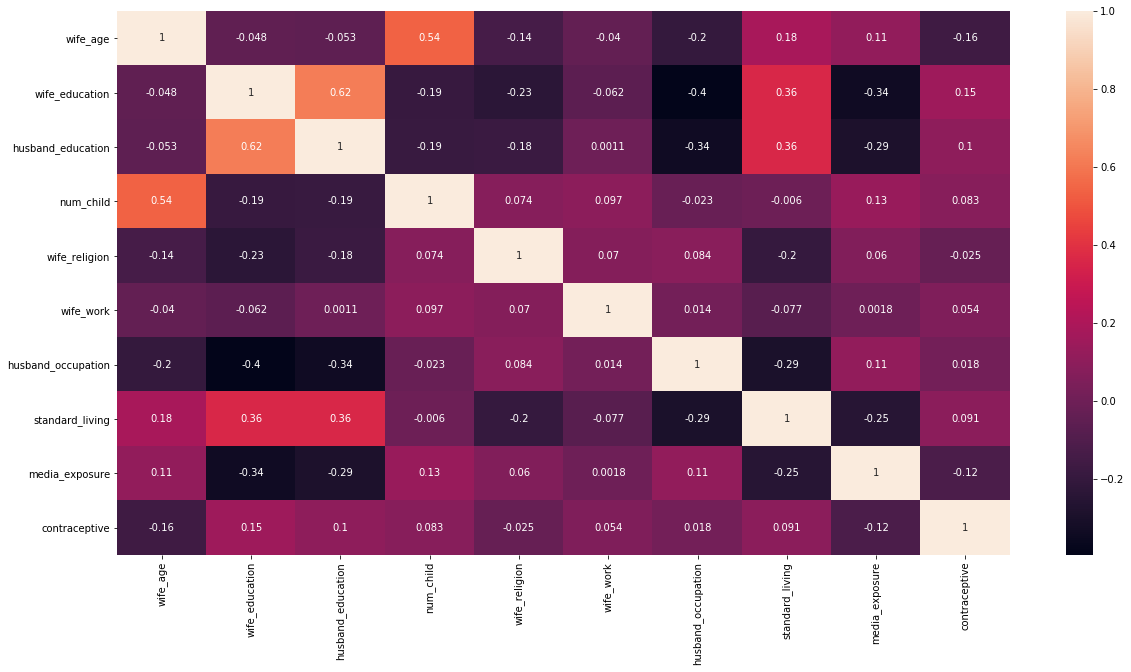

In [7]:
# Create heatmap of variables
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True)
data.corr()

0.42208432303530447


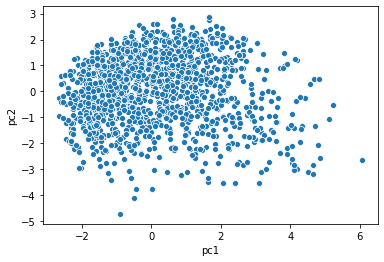

In [8]:
# Principal Component Analysis

# Center data
data_mean = np.mean(data, axis = 0)
data_centered = pd.DataFrame(data - data_mean)

# Scale data
data_std = np.std(data_centered, axis = 0)
data_centered_scaled = pd.DataFrame(data_centered / data_std)

# Decompose matrix
data_u, data_s, data_vt = np.linalg.svd(data_centered_scaled, full_matrices = False)

# Create DataFrame with principal components
data_twopcs = data_centered_scaled @ data_vt.T
data_twopcs = data_twopcs.iloc[:, 0:2]
data_twopcs.columns = ["pc1", "pc2"]

# Make a scatterplot of the principal components
sns.scatterplot(data = data_twopcs, x = "pc1", y = "pc2");

# Calculate proportion of the variance accounted for by first two principal components
print((data_s[0]**2 + data_s[1]**2) / sum(data_s**2))

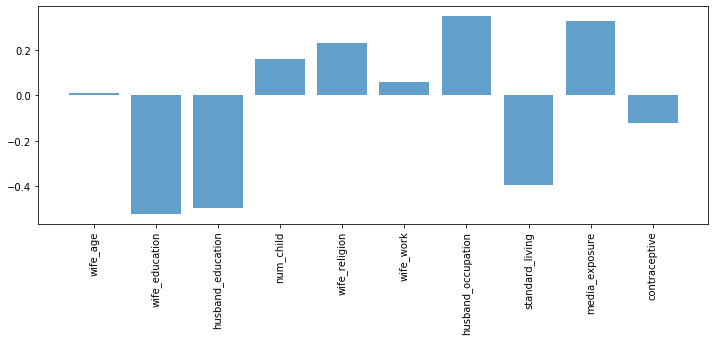

In [9]:
def plot_pc(col_names, vt, k):
    plt.bar(col_names, vt[k, :], alpha=0.7)
    plt.xticks(col_names, rotation=90);

with plt.rc_context({"figure.figsize": (12, 4)}):
    plot_pc(data.columns, data_vt, 0);

<Figure size 1440x720 with 0 Axes>

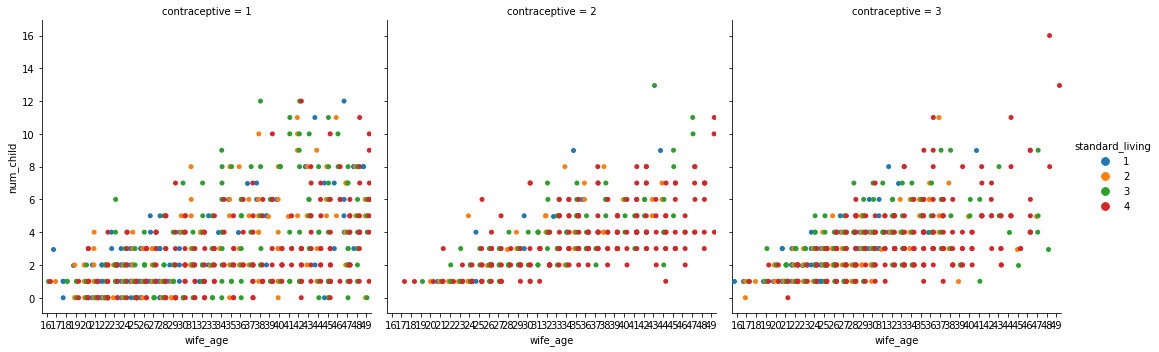

In [15]:
# Scatterplots with number of children as dependent variable
plt.figure(figsize = (20, 10))
sns.catplot(x = "wife_age", y = "num_child", hue = "standard_living",
            col = "contraceptive", jitter = True, dodge = True,
            data = data);

<Figure size 1440x720 with 0 Axes>

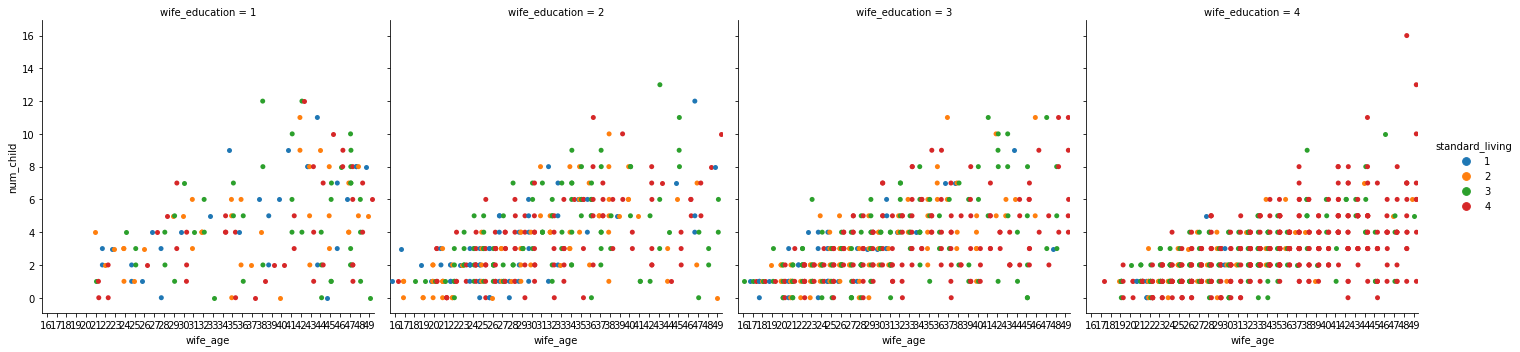

In [16]:
plt.figure(figsize = (20, 10))
sns.catplot(x = "wife_age", y = "num_child", hue = "standard_living",
            col = "wife_education", jitter = True, dodge = True,
            data = data);

## Train-Test Split

We now split the data into a train and test dataset, with 90% in `train` and 10% in `test`.

In [12]:
np.random.seed(seed = 100)

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.1)

In [13]:
print(len(train) + len(test) == len(data))

True


In [14]:
train.to_csv("train.csv", index = False)
test.to_csv("test.csv", index = False)

## Cross Validation

We now set up the cross validation step for our model. We will use five-fold cross validation.

In [17]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [27]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_rmse(model):
    model = clone(model)
    five_fold = KFold(n_splits = 5)
    rmse_values = []
    for train_ind, val_ind in five_fold.split(train):
        model.fit(train.iloc[train_ind,:], train["num_child"].iloc[train_ind])
        rmse_values.append(rmse(train["num_child"].iloc[val_ind], model.predict(train.iloc[val_ind,:])))
    return np.mean(rmse_values)

## Linear Models

We now construct linear regression models for number of children.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

In [35]:
model = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", ["wife_age"]),
        ("origin_encoder", OneHotEncoder(), ["standard_living"])
    ])),
    ("LinearModel", LinearRegression())
])

In [36]:
model.fit(train, train["num_child"])
y_hat = model.predict(train)
y = train["num_child"]
rmse(y, y_hat) # Train error

1.957257981761114

In [37]:
cross_validate_rmse(model) # Cross validation error

1.9605280650823342

In [38]:
model_2 = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", ["wife_age"]),
        ("origin_encoder", OneHotEncoder(), ["wife_education", "standard_living"])
    ])),
    ("LinearModel", LinearRegression())
])

In [39]:
model_2.fit(train, train["num_child"])
y_hat = model_2.predict(train)
y = train["num_child"]
rmse(y, y_hat) # Train error

1.922751745967343

In [40]:
cross_validate_rmse(model_2) # Cross validation error

1.9330913117302058

In [41]:
model_2.fit(test, test["num_child"])
y_hat = model_2.predict(test)
y = test["num_child"]
rmse(y, y_hat) # Test error

1.9785009330039254

In [42]:
model_3 = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", ["wife_age"]),
        ("origin_encoder", OneHotEncoder(), ["contraceptive", "wife_education", "standard_living"])
    ])),
    ("LinearModel", LinearRegression())
])

In [43]:
model_3.fit(train, train["num_child"])
y_hat = model_3.predict(train)
y = train["num_child"]
rmse(y, y_hat) # Train error

1.8435608322853418

In [44]:
cross_validate_rmse(model_3) # Cross validation error

1.8547573517492704

In [45]:
model_3.fit(test, test["num_child"])
y_hat = model_3.predict(test)
y = test["num_child"]
rmse(y, y_hat) # Test error

1.9452339033208577

In [46]:
model_4 = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", ["wife_age"]),
        ("origin_encoder", OneHotEncoder(), ["wife_religion", "contraceptive", "wife_education", "standard_living"])
    ])),
    ("LinearModel", LinearRegression())
])

In [47]:
model_4.fit(train, train["num_child"])
y_hat = model_4.predict(train)
y = train["num_child"]
rmse(y, y_hat) # Train error

1.823354074205617

In [48]:
cross_validate_rmse(model_4) # Cross validation error

1.834521873746413

In [49]:
model_4.fit(test, test["num_child"])
y_hat = model_4.predict(test)
y = test["num_child"]
rmse(y, y_hat) # Test error

1.9366309182070331

In [50]:
model_5 = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", ["wife_age"]),
        ("origin_encoder", OneHotEncoder(), ["wife_work", "wife_religion", "contraceptive", "wife_education", "standard_living"])
    ])),
    ("LinearModel", LinearRegression())
])

In [51]:
model_5.fit(train, train["num_child"])
y_hat = model_5.predict(train)
y = train["num_child"]
rmse(y, y_hat) # Train error

1.8135471735746187

In [52]:
cross_validate_rmse(model_5) # Cross validation error

1.8253205151133276

In [53]:
model_5.fit(test, test["num_child"])
y_hat = model_5.predict(test)
y = test["num_child"]
rmse(y, y_hat) # Test error

1.9115330846217018

In [55]:
model_5.get_params(deep = False)

{'memory': None,
 'steps': [('SelectColumns',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('keep', 'passthrough', ['wife_age']),
                                   ('origin_encoder',
                                    OneHotEncoder(categories='auto', drop=None,
                                                  dtype=<class 'numpy.float64'>,
                                                  handle_unknown='error',
                                                  sparse=True),
                                    ['wife_work', 'wife_religion', 'contraceptive',
                                     'wife_education', 'standard_living'])],
                     verbose=False)),
  ('LinearModel',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))],
 'verbose': False}

In [58]:
model_5.score(train, train["num_child"])

0.3754739109532549

In [59]:
model_4.score(train, train["num_child"])

0.3751571040963835

In [60]:
model_3.score(train, train["num_child"])

0.3629127100752064

In [61]:
model_2.score(train, train["num_child"])

0.3176213541294013

In [62]:
model.score(train, train["num_child"])

0.311251406997112

In [64]:
model_6 = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", ["wife_age"]),
        ("origin_encoder", OneHotEncoder(), ["standard_living"])
    ])),
    ("DecisionTreeModel", DecisionTreeRegressor())
])

In [65]:
model_6.fit(train, train["num_child"])
y_hat = model_6.predict(train)
y = train["num_child"]
rmse(y, y_hat) # Train error

1.8016816897815222

In [66]:
cross_validate_rmse(model_6) # Cross validation error

2.0251309633293593

In [67]:
model_6.fit(test, test["num_child"])
y_hat = model_6.predict(test)
y = test["num_child"]
rmse(y, y_hat) # Test error

1.4197766605229731

In [72]:
model_6.score(train, train["num_child"])

-0.114663138128005

In [71]:
model_6.score(test, test["num_child"])

0.6355151244988538

In [73]:
model_7 = Pipeline([
    ("SelectColumns", ColumnTransformer([
        ("keep", "passthrough", ["wife_age"]),
        ("origin_encoder", OneHotEncoder(), ["wife_work", "wife_religion", "contraceptive", "wife_education", "standard_living"])
    ])),
    ("DecisionTreeModel", DecisionTreeRegressor())
])

In [74]:
model_7.fit(train, train["num_child"])
y_hat = model_7.predict(train)
y = train["num_child"]
rmse(y, y_hat) # Train error

0.8561610129781404

In [75]:
cross_validate_rmse(model_7) # Cross validation error

2.387319982955725

In [76]:
model_7.fit(test, test["num_child"])
y_hat = model_7.predict(test)
y = test["num_child"]
rmse(y, y_hat) # Test error

0.44645752801842675

In [77]:
model_7.score(train, train["num_child"])

-0.26829693659506115

In [78]:
model_7.score(test, test["num_child"])

0.9639587581208364